In [1]:
from src.handlers import process_and_clip_landsat_images
from src.handlers import process_bands_for_binary_image
from src.handlers import process_bands_for_ndsi_image
from src.handlers import process_bands_for_temperature_image
from src.handlers import process_bands_for_true_color_image
from src.handlers import process_satellite_images_metadata
from src.handlers import process_snow_cover_percentange
from src.handlers import process_temperature_roi
from src.settings import settings

from src.frame_image_processor import main_image_frame_visualization

from PIL import Image

import matplotlib.pyplot as plt
import os
import json

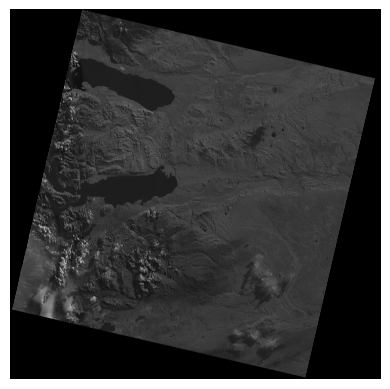

In [2]:
demo_landsat_image = "LC08_L2SP_230095_20130813_20200912_02_T1_SR_B6.TIF"
image_path_file = os.path.join(
    settings.IMAGES_DATASET.ORIGINAL_DATASET_PATH,
    demo_landsat_image,
)
image = Image.open(image_path_file)
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [3]:
print(process_satellite_images_metadata.__doc__)
process_satellite_images_metadata()


    Processes Landsat satellite image files to extract and organize metadata into JSON and text report formats.

    This function scans a designated directory for satellite images, extracts metadata using filename decoding,
    and organizes this data by year. It then writes the organized data into two files: one in JSON format and another
    as a structured text report. If no images are found in the dataset, the function exits with an error message.

    Args:
        None

    Returns:
        None

    The function creates two files:
    - A JSON file containing structured metadata organized by year.
    - A text file providing a metadata report organized by year and month.
    


In [4]:
# metadata json file
json_path_file = os.path.join(
    settings.IMAGES_DATASET.DATASET_PATH,
    settings.IMAGES_DATASET.ORIGINAL_DATASET_METADATA_FILE,
)
with open(json_path_file) as file:
    landsat_images_data = json.load(file)

print(json.dumps(landsat_images_data, indent=4))

{
    "2013": {
        "satellites": [
            "LC08"
        ],
        "correction_level": [
            "L2SP"
        ],
        "collection_number": [
            "02"
        ],
        "collection_category": [
            "T1"
        ],
        "values": [
            {
                "satellite": "LC08",
                "wrs": "230095",
                "acquisition_date": "20130813",
                "processing_date": "20200912",
                "bands": [
                    "SR_B2",
                    "SR_B3",
                    "SR_B4",
                    "SR_B5",
                    "SR_B6",
                    "ST_B10"
                ]
            }
        ],
        "missing_months": [
            "01",
            "02",
            "03",
            "04",
            "05",
            "06",
            "07",
            "09",
            "10",
            "11",
            "12"
        ]
    }
}


In [5]:
# report txt file
txt_path_file = os.path.join(
    settings.IMAGES_DATASET.DATASET_PATH,
    settings.IMAGES_DATASET.ORIGINAL_DATASET_REPORT_FILE,
)
with open(txt_path_file) as file:
    landsat_images_report = file.read()

print(landsat_images_report)

Satellite Image Metadata Report

This report provides information about satellite image files in the specified directory.



**2013**
Missing Months: 01, 02, 03, 04, 05, 06, 07, 09, 10, 11, 12

08
(B10) - LC08_L2SP_230095_20130813_20200912_02_T1_ST_B10.TIF
(B2) - LC08_L2SP_230095_20130813_20200912_02_T1_SR_B2.TIF
(B3) - LC08_L2SP_230095_20130813_20200912_02_T1_SR_B3.TIF
(B4) - LC08_L2SP_230095_20130813_20200912_02_T1_SR_B4.TIF
(B5) - LC08_L2SP_230095_20130813_20200912_02_T1_SR_B5.TIF
(B6) - LC08_L2SP_230095_20130813_20200912_02_T1_SR_B6.TIF




In [6]:
print(process_and_clip_landsat_images.__doc__)
process_and_clip_landsat_images()


    Processes Landsat images data and clips images based on shapefile geometries.

    Loads metadata of Landsat images, generates paths for satellite images, and clips the
    first six images using specified shapefile geometries. The clipped images are saved
    in a designated output directory.

    Args:
        None

    Returns:
        None
    


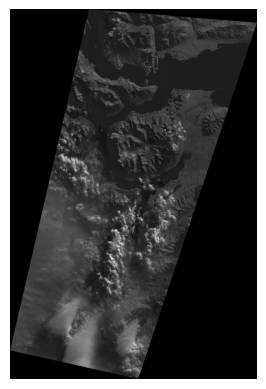

In [7]:
demo_clip_landsat_image = "20130813_230095_SR_B6_CROPPED.TIF"
image_clip_path_file = os.path.join(
    settings.IMAGES_DATASET.ROI_CROPPED_DATASET_PATH,
    demo_clip_landsat_image,
)
clip_image = Image.open(image_clip_path_file)
plt.imshow(clip_image, cmap="gray")
plt.axis("off")
plt.show()

In [8]:
print(process_temperature_roi.__doc__)
process_temperature_roi()


    Processes Landsat band images to calculate and add temperature Region of Interest (ROI) data.

    This function selects Landsat band images with a specific suffix from a designated directory. It then calculates
    the temperature for each image using the `get_and_add_temperature_roi` function. The calculated temperature data
    is added to the metadata of each image and saved in JSON format. Additionally, the function determines the minimum
    and maximum temperatures across all images and saves these as temperature ROI boundaries in a text file.

    Args:
        None

    Returns:
        None
    


In [9]:
print(process_bands_for_temperature_image.__doc__)
process_bands_for_temperature_image()


    Processes Landsat band images to create temperature images.

    This function selects Landsat band images with a specific suffix from a designated directory.
    It then processes these images to generate temperature images using the `create_temperature_images_from_landsat_bands`
    function. The temperature images are calculated using specific scale factors and offsets and are saved in a specified
    output directory. Optionally, the function uses a temperature ROI boundaries file to set the minimum and maximum
    temperature limits for visualization.

    Args:
        None

    Returns:
        None
    


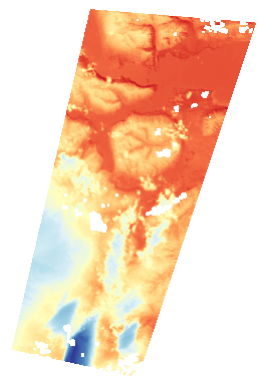

In [10]:
demo_temperature_landsat_image = "20130813_230095_TEMPERATURE.png"
image_temperature_path_file = os.path.join(
    settings.IMAGES_DATASET.ROI_CROPPED_TEMPERATURE_DATASET_PATH,
    demo_temperature_landsat_image,
)
temperature_image = Image.open(image_temperature_path_file)
plt.imshow(temperature_image)
plt.axis("off")
plt.show()

In [11]:
print(process_bands_for_true_color_image.__doc__)
process_bands_for_true_color_image()


    Processes Landsat band images to create true color images.

    This function reads Landsat band images from a specified directory, filters them based on the file extension,
    and then uses these images to create true color images. The resulting true color images are saved
    in a designated output directory.

    Args:
        None

    Returns:
        None
    


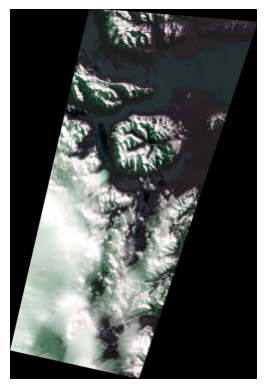

In [12]:
demo_color_landsat_image = "20130813_230095_COLOR.png"
image_color_path_file = os.path.join(
    settings.IMAGES_DATASET.ROI_CROPPED_COLOR_DATASET_PATH,
    demo_color_landsat_image,
)
color_image = Image.open(image_color_path_file)
plt.imshow(color_image)
plt.axis("off")
plt.show()

In [13]:
print(process_bands_for_binary_image.__doc__)
process_bands_for_binary_image()


    Processes Landsat band images to create binary images.

    This function reads Landsat band images from a specified directory, filters them based on the file extension,
    and then uses these images to create binary images. The binary images are generated based on the Normalized
    Difference Snow Index (NDSI) using specific bands. The resulting binary images are saved in a designated
    output directory.

    Args:
        None

    Returns:
        None
    


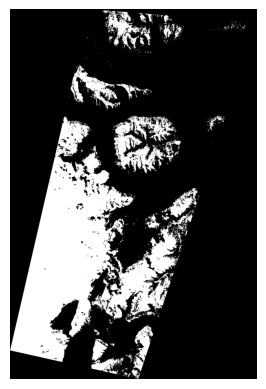

In [14]:
demo_binary_landsat_image = "20130813_230095_BINARY.png"
image_binary_path_file = os.path.join(
    settings.IMAGES_DATASET.ROI_CROPPED_BINARY_DATASET_PATH,
    demo_binary_landsat_image,
)
binary_image = Image.open(image_binary_path_file)
plt.imshow(binary_image, cmap="gray")
plt.axis("off")
plt.show()

In [15]:
print(process_snow_cover_percentange.__doc__)
process_snow_cover_percentange()


    Processes Landsat images to calculate and store snow cover percentages.

    This function identifies the base mask image and generates a list of Landsat image paths.
    It then utilizes the 'get_and_add_snow_cover_percentage' function to calculate the snow cover
    percentage for each image within a specified region of interest (ROI) defined by a shapefile.
    The results are saved to a specified output JSON file.

    Args:
        None

    Returns:
        None
    


In [16]:
print(process_bands_for_ndsi_image.__doc__)
process_bands_for_ndsi_image()


    Process Landsat band images to create images based on the Normalized Difference Snow Index (NDSI).

    This function reads Landsat band images from a specified directory, filters them based on the file extension,
    and then uses these images to create images. The images are generated based on the NDSI using
    specific bands, and the resulting images are saved in a designated output directory.

    Args:
        None

    Returns:
        None
    


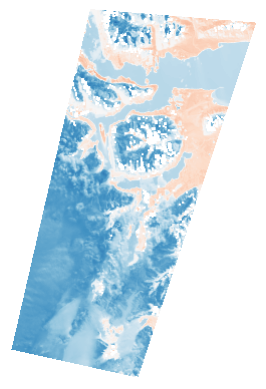

In [17]:
demo_dnsi_landsat_image = "20130813_230095_NDSI.png"
image_dnsi_path_file = os.path.join(
    settings.IMAGES_DATASET.ROI_CROPPED_NDSI_DATASET_PATH,
    demo_dnsi_landsat_image,
)
dnsi_image = Image.open(image_dnsi_path_file)
plt.imshow(dnsi_image)
plt.axis("off")
plt.show()

In [18]:
main_image_frame_visualization()

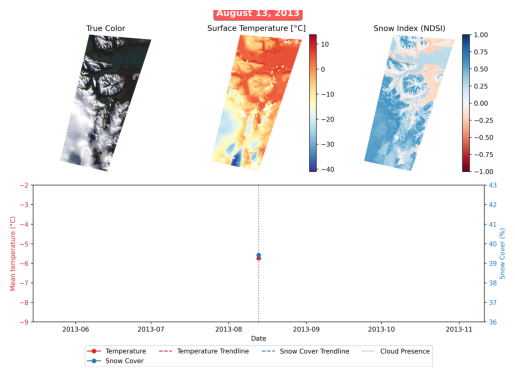

In [19]:
demo_video_frame_landsat_image = "20130813_VIDEO_FRAME.png"
image_video_frame_path_file = os.path.join(
    settings.IMAGES_DATASET.FRAME_VISUALIZATION_DATASET_PATH,
    demo_video_frame_landsat_image,
)
video_frame_image = Image.open(image_video_frame_path_file)
plt.imshow(video_frame_image)
plt.axis("off")
plt.show()